In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Part 1: Standard Gambler's Problem

In [2]:
def sweep(
    target: int   = 100,
    prob_h: float = 0.4,
    gamma : float = 1.0,
):
    V = np.zeros(target + 1)
    V[target] = 1.0

    history = []

    while True:
        delta = 0

        for s in range(1, target):
            v = V[s]

            actions = range(1, min(s, target - s) + 1)
            expected_rewards = [
                (1 - prob_h) * (V[s - a] * gamma)
                 +   prob_h  * (V[s + a] * gamma + (1 if s + a >= target else 0))
                for a in actions
            ]

            V[s] = max(expected_rewards)
            delta = max(delta, abs(v - V[s]))

        history.append(V.copy())

        if delta < 1e-15:
            break

    def policy(s):
        actions = range(1, min(s, target - s) + 1)
        expected_rewards = [
            (1 - prob_h) * (V[s - a] * gamma)
             +   prob_h  * (V[s + a] * gamma + (1 if s + a >= target else 0))
            for a in actions
        ]

        # Find all actions that maximize expected reward
        optim_actions = []
        for a, r in zip(actions, expected_rewards):
            if r == max(expected_rewards):
                optim_actions.append(a)
        return optim_actions

    return history, policy

### Trial 1 ($p = 0.4$, $\gamma = 1$)

In [3]:
Vs, policy = sweep(
    prob_h=0.4,
    gamma=1,
)

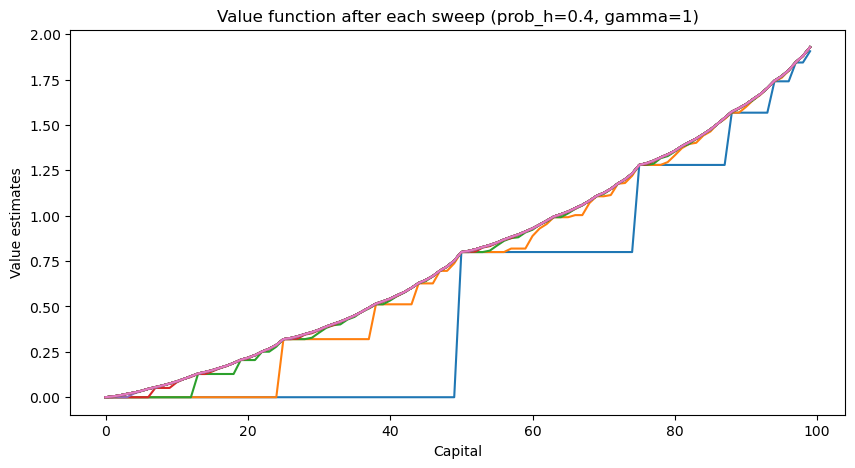

In [4]:
# Plot the value function after each sweep
plt.figure(figsize=(10, 5))

for i, V in enumerate(Vs):
    plt.plot(V[:-1], label=f'iter {i}')

plt.title('Value function after each sweep (prob_h=0.4, gamma=1)')
plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.show()

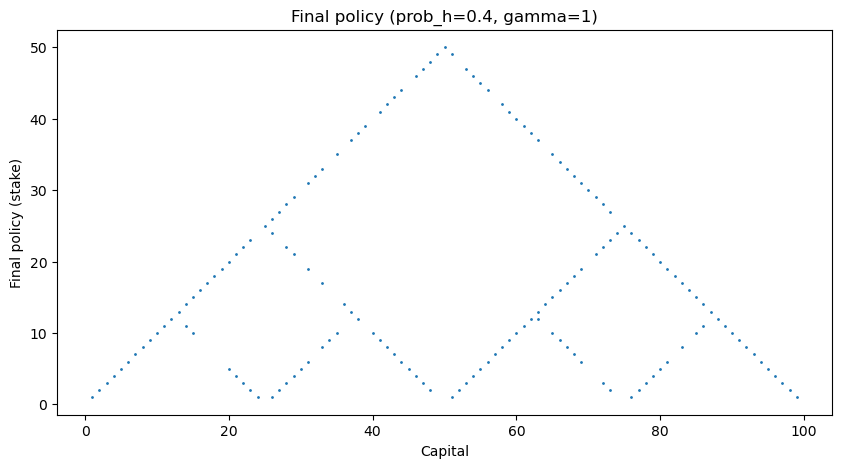

In [5]:
# Plot the policy
plt.figure(figsize=(10, 5))

points = []
for s in range(1, 100):
    for a in policy(s):
        points.append((s, a))
plt.scatter(*zip(*points), s=1)

plt.title('Final policy (prob_h=0.4, gamma=1)')
plt.xlabel('Capital')
plt.ylabel('Final policy (stake)')
plt.show()

### Trial 2 ($p = 0.25$, $\gamma = 1$)

In [6]:
Vs, policy = sweep(
    prob_h=0.25,
    gamma=1,
)

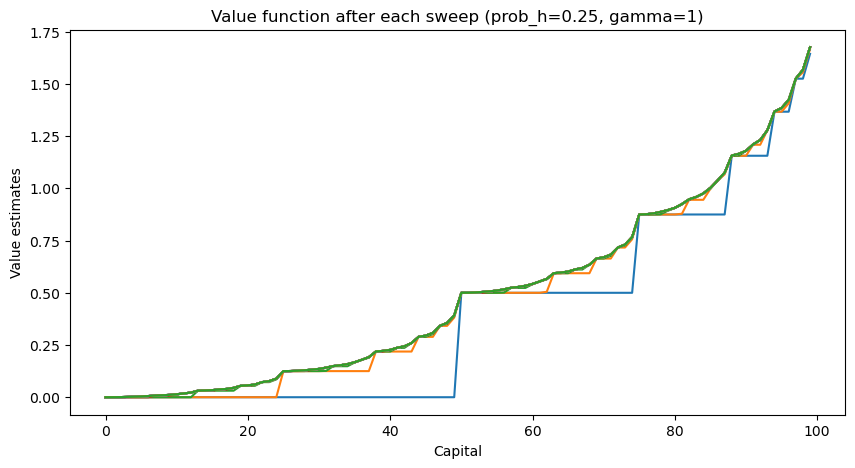

In [7]:
# Plot the value function after each sweep
plt.figure(figsize=(10, 5))

for i, V in enumerate(Vs):
    plt.plot(V[:-1], label=f'iter {i}')

plt.title('Value function after each sweep (prob_h=0.25, gamma=1)')
plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.show()

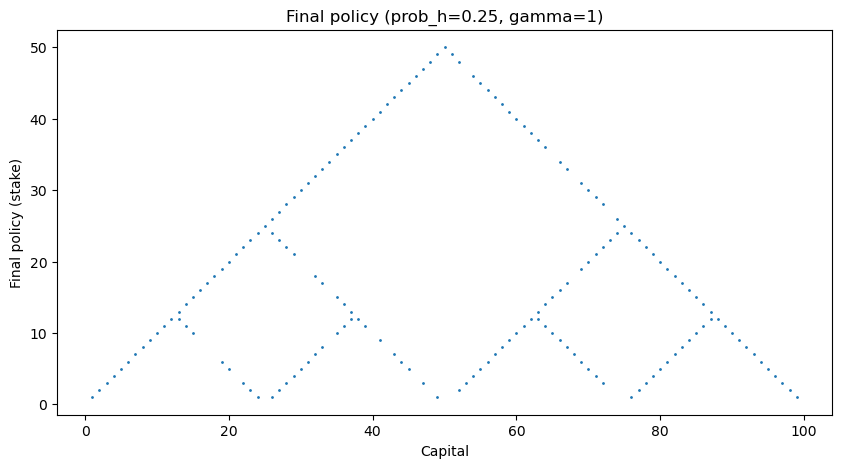

In [8]:
# Plot the policy
plt.figure(figsize=(10, 5))

points = []
for s in range(1, 100):
    for a in policy(s):
        points.append((s, a))
plt.scatter(*zip(*points), s=1)

plt.title('Final policy (prob_h=0.25, gamma=1)')
plt.xlabel('Capital')
plt.ylabel('Final policy (stake)')
plt.show()

### Trial 3 ($p = 0.55$, $\gamma = 1$)

In [9]:
Vs, policy = sweep(
    prob_h=0.55,
    gamma=1,
)

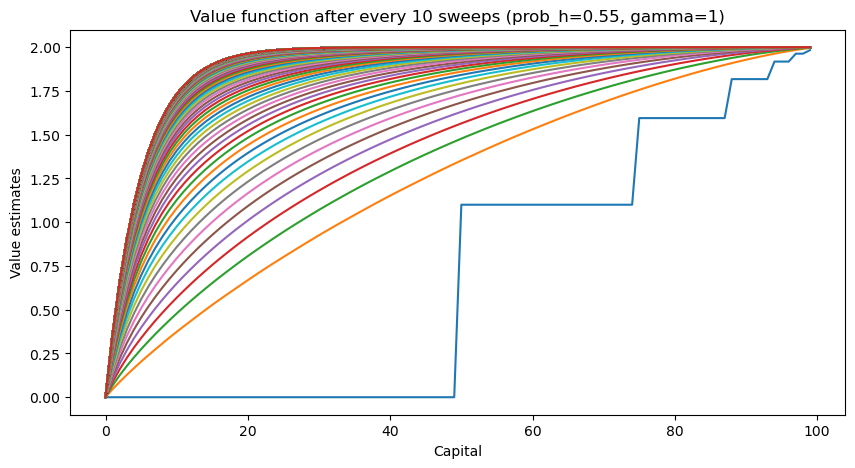

In [10]:
# Plot the value function after every 10 sweeps
plt.figure(figsize=(10, 5))

for i, V in enumerate(Vs):
    plt.plot(V[:-1], label=f'iter {i}') if 0 == i % 10 else None

plt.title('Value function after every 10 sweeps (prob_h=0.55, gamma=1)')
plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.show()

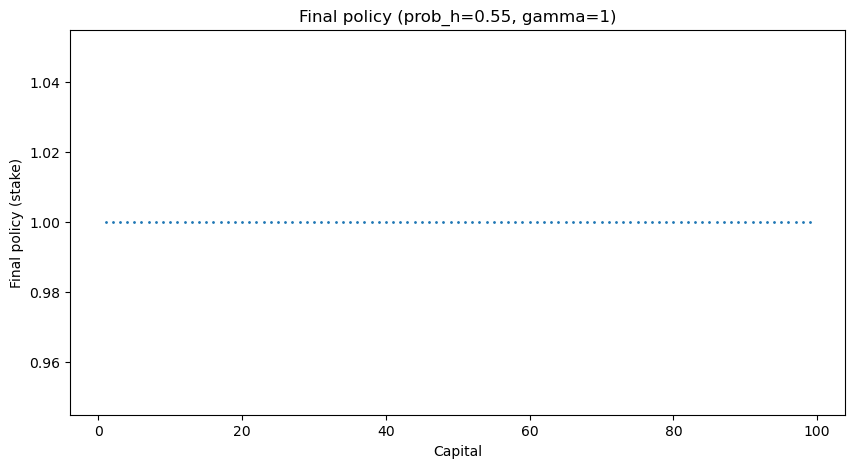

In [11]:
# Plot the policy
plt.figure(figsize=(10, 5))

points = []
for s in range(1, 100):
    for a in policy(s):
        points.append((s, a))
plt.scatter(*zip(*points), s=1)

plt.title('Final policy (prob_h=0.55, gamma=1)')
plt.xlabel('Capital')
plt.ylabel('Final policy (stake)')
plt.show()

### Trial 4: Varying Probability ($\gamma = 1$)

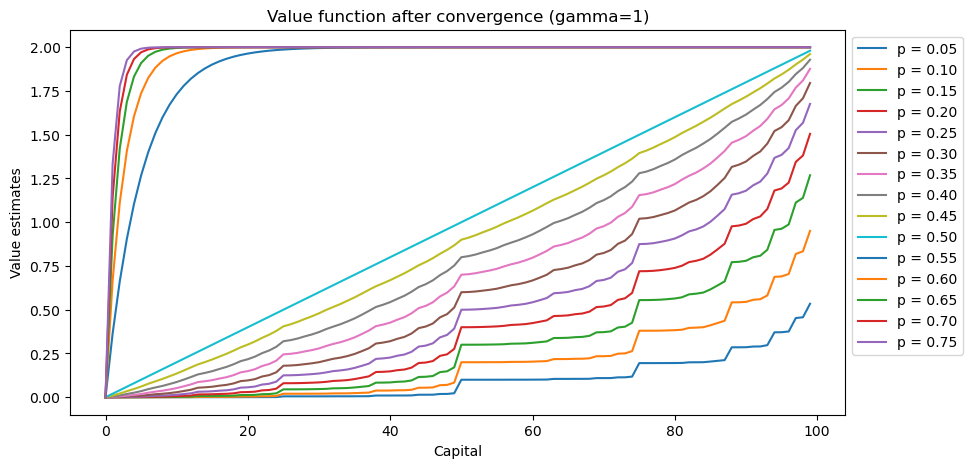

In [12]:
h_probs = np.linspace(0.05, 0.75, 15)
iters = []

plt.figure(figsize=(10, 5))
for h_prob in h_probs:
    Vs, policy = sweep(
        prob_h=h_prob,
        gamma=1,
    )

    iters.append(len(Vs))
    plt.plot(Vs[-1][:-1], label=f'p = {h_prob:.2f}')

plt.title('Value function after convergence (gamma=1)')
plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### Trial 5: Varying $\gamma$ ($p = 0.4$)

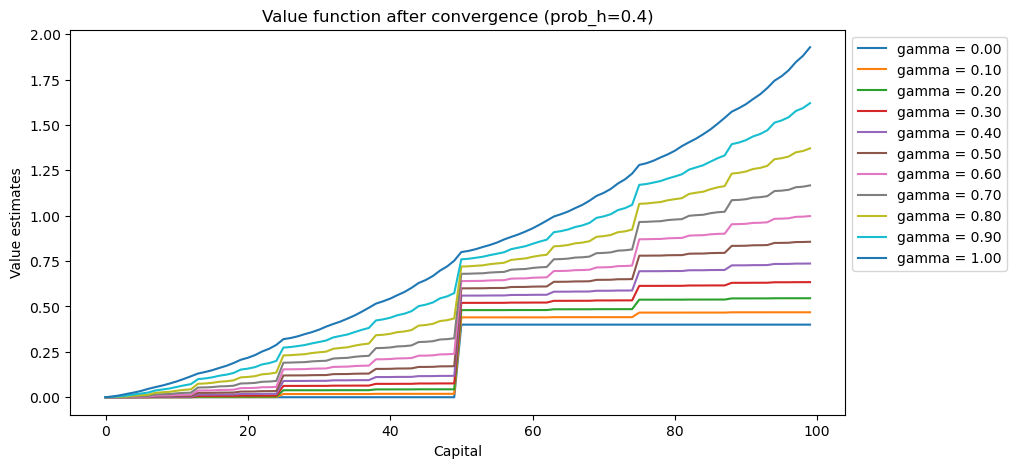

In [14]:
gamma_vals = np.linspace(0, 1, 11)
iters = []

plt.figure(figsize=(10, 5))
for gamma_val in gamma_vals:
    Vs, policy = sweep(
        prob_h=0.4,
        gamma=gamma_val,
    )

    iters.append(len(Vs))
    plt.plot(Vs[-1][:-1], label=f'gamma = {gamma_val:.2f}')

plt.title('Value function after convergence (prob_h=0.4)')
plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

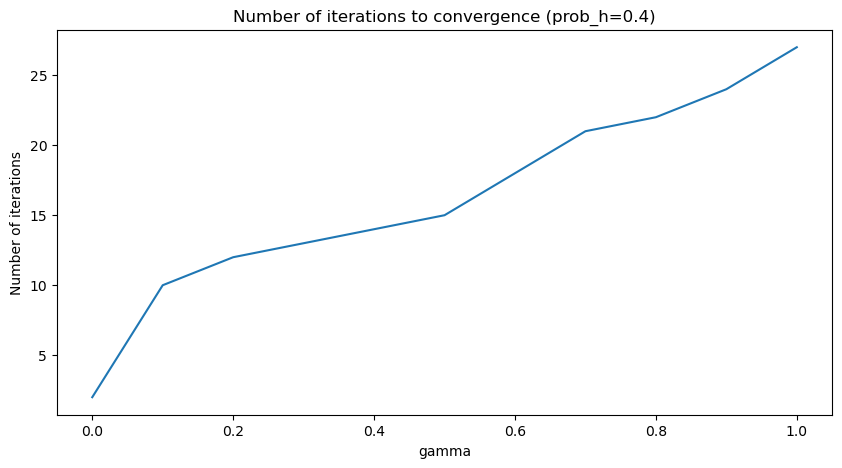

In [15]:
df = pd.DataFrame({
    'gamma': gamma_vals,
    'iters': iters,
})

plt.figure(figsize=(10, 5))
plt.plot(df['gamma'], df['iters'])

plt.title('Number of iterations to convergence (prob_h=0.4)')
plt.xlabel('gamma')
plt.ylabel('Number of iterations')
plt.show()

## Part 2: Gambler's Problem With Dense Rewards

In [150]:
def sweep_dense(
    target: int   = 100,
    prob_h: float = 0.4,
    gamma : float = 1.0,
):
    V = np.zeros(target + 1)
    V[target] = 1.0

    history = []

    while True:
        delta = 0

        for s in range(1, target):
            v = V[s]

            actions = range(1, min(s, target - s) + 1)
            expected_rewards = [
                (1 - prob_h) * (V[s - a] * gamma - a)
                 +   prob_h  * (V[s + a] * gamma + (100 if s + a >= target else a))
                for a in actions
            ]

            V[s] = max(expected_rewards)
            delta = max(delta, abs(v - V[s]))

        history.append(V.copy())

        if delta == 0:
            break

    def policy(s):
        actions = range(1, min(s, target - s) + 1)
        expected_rewards = [
            (1 - prob_h) * (V[s - a] * gamma - 1)
             +   prob_h  * (V[s + a] * gamma + (100 if s + a >= target else 1))
            for a in actions
        ]

        # Find all actions that maximize expected reward
        optim_actions = []
        for a, r in zip(actions, expected_rewards):
            if r == max(expected_rewards):
                optim_actions.append(a)
        return optim_actions

    return history, policy

In [158]:
V1s, policy1 = sweep()
V2s, policy2 = sweep_dense()

print(len(V1s), len(V2s))

27 42


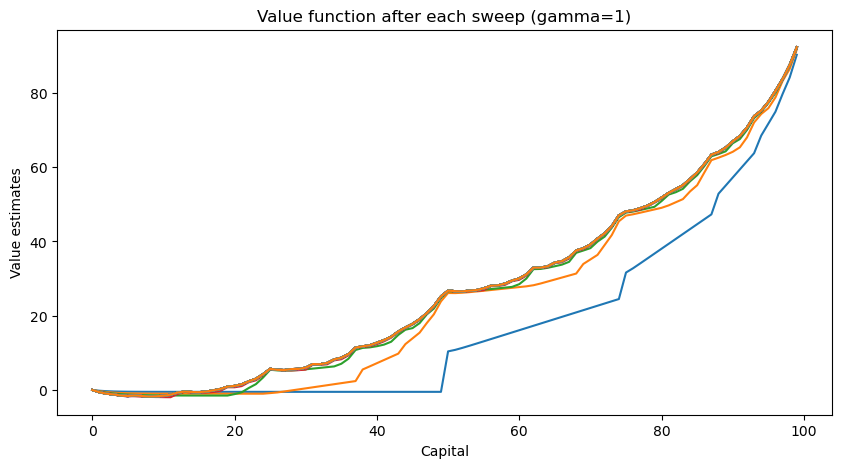

In [159]:
# Plot the value function after each sweep
plt.figure(figsize=(10, 5))

for i, V in enumerate(V2s):
    plt.plot(V[:-1], label=f'iter {i}')

plt.title('Value function after each sweep (gamma=1)')
plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.show()

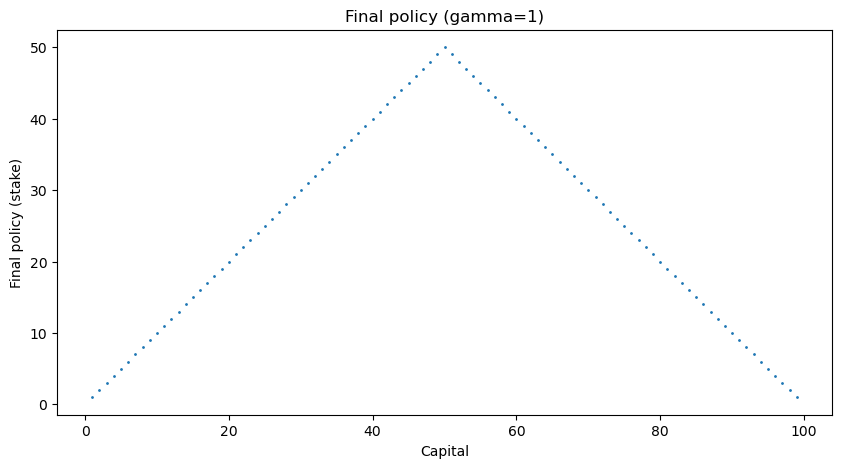

In [160]:
# Plot the policy
plt.figure(figsize=(10, 5))

points = []
for s in range(1, 100):
    for a in policy(s):
        points.append((s, a))

plt.scatter(*zip(*points), s=1)

plt.title('Final policy (gamma=1)')
plt.xlabel('Capital')
plt.ylabel('Final policy (stake)')
plt.show()

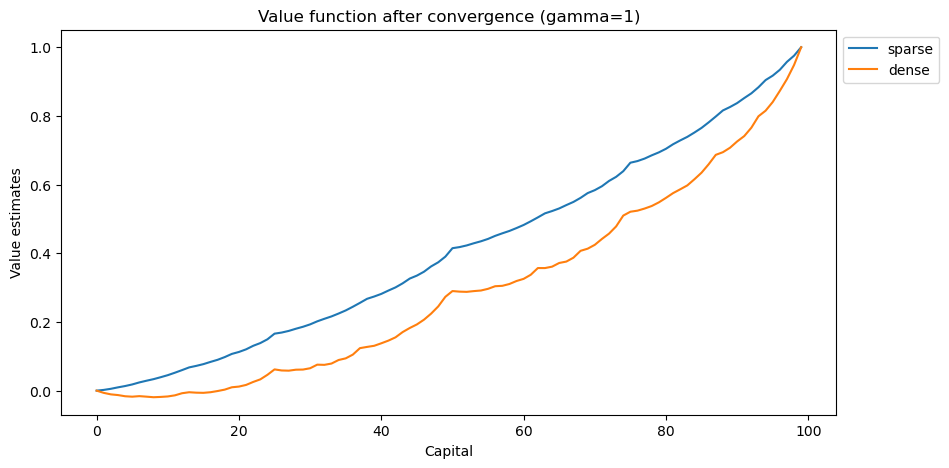

In [164]:
plt.figure(figsize=(10, 5))

plt.plot(V1s[-1][:-1] / max(V1s[-1][:-1]), label='sparse')
plt.plot(V2s[-1][:-1] / max(V2s[-1][:-1]), label='dense')

plt.title('Value function after convergence (gamma=1)')
plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()